## Run Model

In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)

running file: run.py
running file: asset_utils.py
end of file: asset_utils.py
running file: sim_setup.py
end of file: sim_setup.py
end of file: run.py

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 9, 30)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0]
SubsetIDs: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Ns       : [0, 1, 2, 3, 4, 5, 6, 7, 8]
ExpIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0]
Execution Mode: parallelized
{'q_sold': 2100, 'ri_sold': 1050, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 10.5, 'fee_percent': 1.0, 'fees': [], 'oracle_price_i': 1, 'oracle_price_j': 2, 'oracle_price_h

 R added to pool of  i  =  1074
 R removed from pool of  j  =  1075.2809473316884
{'q_sold': 2036, 'ri_sold': 1018, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 10.18, 'fee_percent': 1.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  1018
 R removed from pool of  i  =  1016.9008268886246
{'q_sold': 1978, 'ri_sold': 989, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 9.89, 'fee_percent': 1.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  989
 R removed from pool of  i  =  984.0743704426568
{'q_sold': 1940, 'ri_sold': 970, 'ri_deposit': 0, 'q_deposit': 0

 R added to pool of  i  =  909
 R removed from pool of  j  =  894.365884551662
{'q_sold': 2310, 'ri_sold': 1155, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 11.55, 'fee_percent': 1.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1155
 R removed from pool of  j  =  1131.877241362352
{'q_sold': 1844, 'ri_sold': 922, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 9.22, 'fee_percent': 1.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  922
 R removed from pool of  j  =  899.9252338836668
{'q_sold': 1936, 'ri_sold': 968, 'ri_deposit': 0, 'q_deposit': 0, 'S

{'q_sold': 1854, 'ri_sold': 927, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 9.27, 'fee_percent': 1.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  927
 R removed from pool of  i  =  902.5957173127681
{'q_sold': 2044, 'ri_sold': 1022, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 10.22, 'fee_percent': 1.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1022
 R removed from pool of  j  =  1049.3850215823622
{'q_sold': 2010, 'ri_sold': 1005, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction

 R added to pool of  i  =  987
 R removed from pool of  j  =  1009.2425744378706
{'q_sold': 2020, 'ri_sold': 1010, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 20.2, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  1010
 R removed from pool of  i  =  987.7392896862002
{'q_sold': 2120, 'ri_sold': 1060, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 21.2, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1060
 R removed from pool of  j  =  1083.7347951334668
{'q_sold': 1838, 'ri_sold': 919, 'ri_deposit': 0, 'q_deposit': 0

 R added to pool of  i  =  894
 R removed from pool of  j  =  885.3540561620612
{'q_sold': 1972, 'ri_sold': 986, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 19.72, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  986
 R removed from pool of  i  =  995.4276354953181
{'q_sold': 2026, 'ri_sold': 1013, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 20.26, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1013
 R removed from pool of  j  =  1003.3708766332129
{'q_sold': 2104, 'ri_sold': 1030.96, 'ri_deposit': 50000, 'q_depo

{'q_sold': 2382, 'ri_sold': 1191, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 23.82, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1191
 R removed from pool of  j  =  1193.3639365029521
{'q_sold': 1722, 'ri_sold': 861, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 17.22, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  861
 R removed from pool of  j  =  859.175178613048
{'q_sold': 2114, 'ri_sold': 1057, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction

{'q_sold': 1626, 'ri_sold': 813, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 16.26, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  813
 R removed from pool of  i  =  822.1974580669776
{'q_sold': 1930, 'ri_sold': 965, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 19.3, 'fee_percent': 2.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  965
 R removed from pool of  j  =  953.9408302853117
{'q_sold': 2004, 'ri_sold': 1002, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 

{'q_sold': 1892, 'ri_sold': 946, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 47.300000000000004, 'fee_percent': 5.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  946
 R removed from pool of  i  =  929.9752506581135
{'q_sold': 1994, 'ri_sold': 997, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 49.85, 'fee_percent': 5.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  997
 R removed from pool of  j  =  1014.0459647848038
{'q_sold': 1892, 'ri_sold': 946, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i',

{'q_sold': 2212, 'ri_sold': 1106, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 55.300000000000004, 'fee_percent': 5.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1106
 R removed from pool of  j  =  1120.87537070096
{'q_sold': 1812, 'ri_sold': 906, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 45.300000000000004, 'fee_percent': 5.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  906
 R removed from pool of  i  =  894.3485761830816
{'q_sold': 2528, 'ri_sold': 1264, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'a

 R added to pool of  i  =  937
 R removed from pool of  j  =  944.2278218548745
{'q_sold': 1894, 'ri_sold': 947, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 47.35, 'fee_percent': 5.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  947
 R removed from pool of  i  =  939.7458957603667
{'q_sold': 1876, 'ri_sold': 938, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 46.900000000000006, 'fee_percent': 5.0, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  938
 R removed from pool of  i  =  927.4117090916261
{'q_sold': 1890, 'ri_sold': 945, 'ri_deposit': 0, 'q_de

In [2]:
rdf

,UNI_Qi,UNI_Ri,UNI_Si,UNI_Qj,UNI_Rj,UNI_Sj,UNI_ij,UNI_ji,UNI_Sij,uni_agents,...,fee_revenue_2,fee_percent,oracle_price_i,oracle_price_j,oracle_price_hydra,simulation,subset,run,substep,timestep
3,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",1.00,1,2,2,0,0,1,3,1
6,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",1.00,1,2,2,0,0,1,3,2
9,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",1.00,1,2,2,0,0,1,3,3
12,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",1.00,1,2,2,0,0,1,3,4
15,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",1.00,1,2,2,0,0,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",5.00,3,2,2,0,8,8,3,96
2699,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",5.00,3,2,2,0,8,8,3,97
2702,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",5.00,3,2,2,0,8,8,3,98
2705,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"[0, 0, 0]",5.00,3,2,2,0,8,8,3,99


In [3]:
hydra = rdf[['Q', 'H', 'Sq']]

hydra.columns = ['Hydra_Q', 'Hydra_H', 'Hydra_Sq']

rdf.columns

Index(['UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj', 'UNI_ij',
       'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj', 'UNI_P_ij',
       'pool', 'Q', 'H', 'Sq', 'Y', 'hydra_agents', 'C', 'asset_random_choice',
       'trade_random_size', 'trade_random_direction', 'purchased_asset_id',
       'fee_revenue', 'fee_revenue_2', 'fee_percent', 'oracle_price_i',
       'oracle_price_j', 'oracle_price_hydra', 'simulation', 'subset', 'run',
       'substep', 'timestep'],
      dtype='object')

In [25]:
print(rdf.pool[rdf.first_valid_index()])
# !!! does not run

<class 'model.parts.v2_asset_utils.V2_Asset'>: {'pool': {'i': {'R': 1001050, 'S': 1000000, 'C': 1, 'P': 1.9958066057511399, 'dP': -0.004193394248860116}, 'j': {'R': 998952.2003792038, 'S': 1000000, 'C': 1.0, 'P': 2.0041977950024252, 'dP': 0.004197795002425231}}}


In [4]:
rdf.pool[3].pool

{'i': {'R': 1001050,
  'S': 1000000,
  'C': 1,
  'P': 1.9958066057511399,
  'dP': -0.004193394248860116},
 'j': {'R': 998952.2003792038,
  'S': 1000000,
  'C': 1.0,
  'P': 2.0041977950024252,
  'dP': 0.004197795002425231}}

### Define Arbitrage Wedge Plot in Code

In [21]:
def AW_plot(experiments,test_title,T):

    """
    This function plots the Arbitrage Wedge (AW) a metric that defines 
    overall potential IL in the pool due to external market prices.
    """
    
    AW = []
    V1 = []
    VH = []
     
    #Define timesteps as seen in plot_utils.py
    df = experiments
    df = df[df['substep'] == df.substep.max()]
    df.fillna(0,inplace=True)
    df.reset_index()

    #Iterate through timesteps and calculate AW for each time step.
    for i in range(df.substep.max(),T, df.substep.max()): 
        
        #Get Quantities for all assets in the pool and in the fee revenue basket.
        Ri = df.pool[i].pool['i']['R'] #+ df['fee_revenue'][i]['i']
        Rj = df.pool[i].pool['j']['R'] #+ df['fee_revenue'][i]['j']
        Q = rdf['Q'][i] #+ df['fee_revenue'][i]['Q']
        
        #Get Quantities for all shares.
        Si = df.pool[i].pool['i']['S']
        Sj = df.pool[i].pool['j']['S']           
        Sq = rdf['Sq'][i]
        
        #Get external market prices.
        #oracles = rdf[['oracle_price_i', 'oracle_price_j', 'oracle_price_Q']]
        MPi = 1 #oracles['oracle_price_i']
        MPj = 2 #oracles['oracle_price_j']
        MPq = 1 #oracles['oracle_price_Q']
        
        #Calculate Arbitrage Wedge.
        Total_V1t = Ri*MPi + Rj*MPj + Q*MPq
        Total_VHt = Si*MPi + Sj*MPj + Sq*MPq
        
        V1.append(Total_V1t)
        VH.append(Total_VHt)
        
        AWt = (Total_V1t -Total_VHt) / Total_VHt
        AW.append(AWt)
    
    mathAW = np.array(AW)

    #Plot Arbitrage Wedge across timesteps.
    plt.figure(figsize=(20,6))
    plt.subplot(141)
    plt.plot(mathAW)
    plt.xlabel('Timestep')
    plt.ylabel('Arbitrage Wedge')
    plt.legend()
    
    plt.subplot(142)
    plt.plot(V1)
    
    plt.subplot(143)
    plt.plot(VH)
    

### Execute Arbitrage Plot

No handles with labels found to put in legend.


900


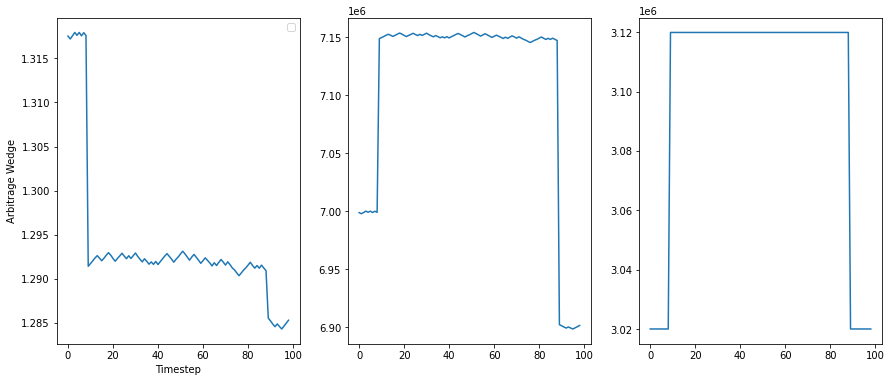

In [22]:
print(len(rdf['timestep']))
AW_plot(rdf,'Arbitrage Wedge Omnipool', 300)